# Implement Perceptron

Roughly following https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

Although I'm using a matrix formulation of this algorithm.

In [1]:
# Importing libraries
import numpy as np

In [53]:
# Making a prediction from a row given some weights
def predict(X, weights):
    return np.dot(X, weights)

In [63]:
def transfer(activation):
    return np.asarray([1.0 if value >=0 else 0.0 for value in activation])

In [78]:
# Import a sample dataset with sample weights to test our function
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
weights = [-0.1, 0.20653640140000007, -0.23418117710000003]

In [79]:
# my predict function expects the first value of each input to be one
dataset = [[1]+row for row in dataset]

In [80]:
X = [row[0:-1] for row in dataset]
y = [row[-1] for row in dataset]
X[:3]

[[1, 2.7810836, 2.550537003],
 [1, 1.465489372, 2.362125076],
 [1, 3.396561688, 4.400293529]]

In [85]:
predictions = transfer(predict(X, weights))
for i in range(len(y)):
    print(f'Expected={y[i]}, Predicted={predictions[i]}')

Expected=0, Predicted=0.0
Expected=0, Predicted=0.0
Expected=0, Predicted=0.0
Expected=0, Predicted=0.0
Expected=0, Predicted=0.0
Expected=1, Predicted=1.0
Expected=1, Predicted=1.0
Expected=1, Predicted=1.0
Expected=1, Predicted=1.0
Expected=1, Predicted=1.0


In [126]:
def train_weights(train, l_rate, n_epoch):
    X = np.asarray([row[0:-1] for row in dataset])
    y = np.asarray([row[-1] for row in dataset])
    weights = [0]*len(X[0])
    for epoch in range(n_epoch):
        predictions = transfer(predict(X,weights))
        errors = y - predictions
        sum_error = (errors**2).sum()
        delta_weights = l_rate*np.dot(X.T, errors)
        weights += delta_weights
        #print(f'epoch={epoch}, l_rate={l_rate}, sum_error={sum_error:.3f}')
    return weights

In [88]:
l_rate = 0.1
n_epoch = 5
weights = train_weights(dataset, l_rate, n_epoch)
print(weights)

epoch=0, l_rate=0.1, sum_error=5.000
epoch=1, l_rate=0.1, sum_error=5.000
epoch=2, l_rate=0.1, sum_error=5.000
epoch=3, l_rate=0.1, sum_error=0.000
epoch=4, l_rate=0.1, sum_error=0.000
[-0.5         1.204119   -1.84515168]


In [124]:
def perceptron(train, test, l_rate, n_epoch):
    weights = train_weights(train, l_rate, n_epoch)
    X_test = np.asarray([row[0:-1] for row in test])
    predictions = transfer(predict(X_test, weights))
    return predictions

## Testing against Sonar Dataset

In [96]:
# Importing Libraries
from csv import reader
from random import seed
from random import randrange

In [115]:
dataset = []
with open('sonar.all-data', 'r') as file:
    csv_reader = reader(file)
    for row in csv_reader:
        if not row:
            continue
        for i in range(len(row)-1):
            row[i] = float(row[i])
        dataset.append(row)

In [121]:
for row in dataset:
    y_premap = [row[-1] for row in dataset]
unique_y = set(y_premap)
mapping_y = dict()
for i, value in enumerate(unique_y):
    mapping_y[value] = i
for row in dataset: 
    row[-1] = mapping_y[row[-1]]

In [99]:
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = []
    for validation_fold in folds:
        train_set = [row for row in dataset if not(row in validation_fold)]
        predicted = algorithm(train_set, validation_fold, *args)
        actual = [row[-1] for row in validation_fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

In [100]:
def cross_validation_split(dataset, n_folds):
    dataset_folds = []
    dataset_copy = dataset.copy()
    fold_size = int(len(dataset_copy)/n_folds)
    for _ in range(n_folds):
        fold = []
        while len(fold) < fold_size:
            rand_index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(rand_index))
        dataset_folds.append(fold)
    return dataset_folds

In [101]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct+=1
    return correct / float(len(actual)) * 100.0

In [135]:
seed(123)
n_folds = 3
l_rate = 0.01
n_epoch = 500
scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
print(f'Scores: {scores}')
print(f'Mean Accuracy: {sum(scores)/float(len(scores)):.2f}')

Scores: [78.26086956521739, 82.6086956521739, 72.46376811594203]
Mean Accuracy: 77.78


## Testing various parameters

In [146]:
from matplotlib import pyplot as plt
%matplotlib inline

In [143]:
# using cross validation (with 3 folds) to test different learning rates
l_rates = [0.1, 0.01, 0.001]
mean_accuracies = {}
for l_r in l_rates:
    seed(123)
    scores = evaluate_algorithm(dataset, perceptron, n_folds, l_r, n_epoch)
    mean_accuracies[l_r] = sum(scores)/float(len(scores))
for l_r, ma in mean_accuracies.items():
    print(f'{l_r}: {ma:.2f}%')

0.1: 77.78%
0.01: 77.78%
0.001: 77.78%


In [152]:
# using cross validation (with 3 folds) to test different n_epochs
n_epochs = [1, 5, 10, 50, 100, 500, 1000]
mean_accuracies = {}
for n_e in n_epochs:
    seed(123)
    scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_e)
    mean_accuracies[n_e] = sum(scores)/float(len(scores))
for n_e, ma in mean_accuracies.items():
    print(f'{n_e}: {ma:.2f}%')

1: 53.62%
5: 46.38%
10: 53.62%
50: 59.90%
100: 67.15%
500: 77.78%
1000: 80.68%


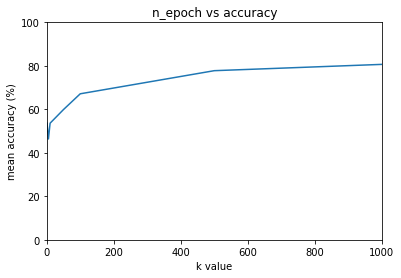

In [153]:
x = [item[0] for item in mean_accuracies.items()]
y = [item[1] for item in mean_accuracies.items()]
plt.figure()
plt.plot(x, y)
plt.xlabel('k value')
plt.ylabel('mean accuracy (%)')
plt.axis([min(x), max(x), 0, 100])
plt.title('n_epoch vs accuracy')
plt.show()

Note: 53% is equivalent to random guessing